In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [47]:
steps = pd.read_csv('steps.csv')
steps['week_start'] = pd.to_datetime(steps['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [48]:
steps

,participID,dataDate,sum(steps),sum(calories),week_start
0,3LZGLG,2015-08-25,19903,1831.913911,2015-08-24
1,3LZGLG,2015-08-26,11976,1326.458338,2015-08-24
2,3LZGLG,2015-08-27,13516,1342.583727,2015-08-24
3,3LZGLG,2015-08-28,14195,1488.640322,2015-08-24
4,3LZGLG,2015-08-29,13669,1474.487106,2015-08-24
...,...,...,...,...,...
33943,4GM577,2016-05-02,6444,1246.858865,2016-05-02
33944,4GM577,2016-05-03,15046,2456.282402,2016-05-02
33945,4GM577,2016-05-04,5061,975.124408,2016-05-02
33946,4GM577,2016-05-05,9892,1585.090266,2016-05-02


In [49]:
weekly_avg = steps.groupby(['participID', 'week_start'], as_index=False).mean()
weekly_avg.head()

,participID,week_start,sum(steps),sum(calories)
0,3LZGLG,2015-08-24,13693.666667,1422.050581
1,3LZGLG,2015-08-31,16382.428571,1736.975971
2,3LZGLG,2015-09-07,13074.000000,1423.881181
3,3LZGLG,2015-09-14,16618.428571,1861.427744
4,3LZGLG,2015-09-21,13124.142857,1618.719034


In [50]:
pivot_steps = weekly_avg.pivot(index='participID', columns='week_start', values='sum(steps)')
pivot_steps
#195 subjects

week_start,2015-08-24,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,13693.666667,16382.428571,13074.000000,16618.428571,13124.142857,12377.857143,11945.285714,13656.571429,8199.00,11940.000000,...,9648.000000,5205.666667,10765.285714,11655.285714,8974.857143,13725.000000,12012.142857,12065.142857,9065.428571,10990.2
3LZJFK,17515.800000,17009.571429,17261.285714,15180.400000,18441.857143,14754.714286,12912.428571,15497.571429,9556.80,13600.000000,...,15444.285714,8829.714286,12181.166667,13234.285714,15065.000000,13733.000000,18923.333333,14906.571429,14412.000000,NaN
3LZRZQ,NaN,7277.000000,10857.500000,10586.833333,12561.000000,12004.000000,12588.428571,13599.000000,10307.25,12598.571429,...,14329.000000,10320.000000,11867.142857,10540.666667,13505.000000,10016.666667,14865.857143,12672.285714,12992.428571,15743.6
3M29ZH,14448.600000,15619.142857,12440.400000,15291.000000,16806.833333,13968.166667,16149.500000,14851.666667,9684.00,15306.000000,...,10740.400000,3481.666667,12137.200000,14322.500000,12338.600000,11871.666667,14124.500000,13443.285714,10288.000000,13133.5
3M2QNS,15704.500000,13981.666667,14349.833333,11775.714286,11036.200000,8097.333333,11059.200000,11868.142857,4589.00,12403.833333,...,11060.500000,11609.200000,13792.285714,9935.571429,12938.500000,9952.500000,11512.500000,11082.714286,9524.200000,7576.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4DFW5M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7429.000000,8964.000000,6802.000000,9404.857143,8639.142857,10683.000000,9384.000000,12013.800000,10417.0
4FBSDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17184.666667,10028.142857,14305.142857,13027.571429,16699.857143,12102.571429,10982.714286,13066.6
4FPNWY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9135.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
pivot_steps_drop = pivot_steps.dropna()
#71 participants who had at least one night of data from all 37 weeks 

In [52]:
pd_steps = pivot_steps_drop[(np.abs(stats.zscore(pivot_steps_drop)) < 3).all(axis=1)]
#63 participants

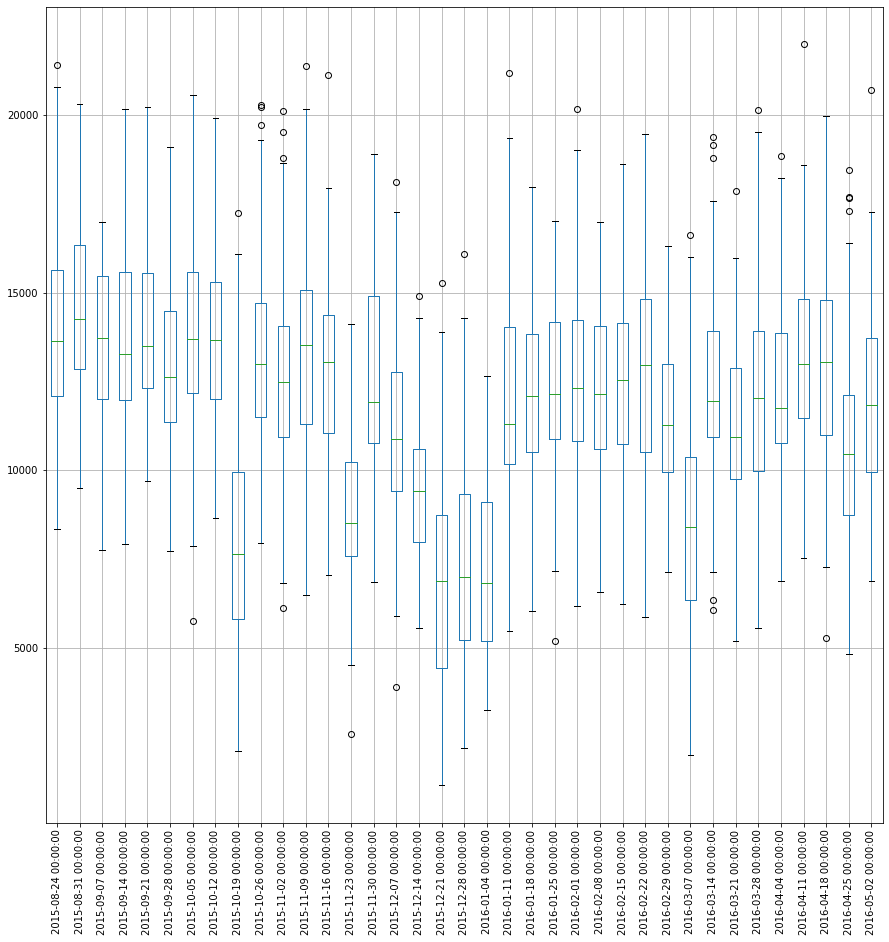

In [53]:
pd_steps.boxplot(figsize=(15,15))
plt.xticks(rotation=90);

In [54]:
pd_steps_flat = pd_steps.reset_index()

In [55]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [56]:
weeks = pd_steps.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_steps_flat[weeks[index]]
        next_week = pd_steps_flat[weeks[index+1]]
        paired_t_test(this_week, next_week)

2015-08-31 00:00:00
reject null hypothesis
2015-09-07 00:00:00
reject null hypothesis
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
reject null hypothesis
2015-10-05 00:00:00
reject null hypothesis
2015-10-12 00:00:00
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
reject null hypothesis
2015-11-02 00:00:00
2015-11-09 00:00:00
reject null hypothesis
2015-11-16 00:00:00
reject null hypothesis
2015-11-23 00:00:00
reject null hypothesis
2015-11-30 00:00:00
reject null hypothesis
2015-12-07 00:00:00
reject null hypothesis
2015-12-14 00:00:00
reject null hypothesis
2015-12-21 00:00:00
reject null hypothesis
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
reject null hypothesis
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
2016-02-08 00:00:00
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
reject null hypothesis
2016-03-07 00:00:00
reject null hypothesis
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
reject nu

In [57]:
def check_normal(before, after):
    diff = before - after
    diff.plot(kind='hist', title= 'Efficiency Difference')
    plt.show()

In [58]:
weeks = pd_steps.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
       # print(weeks[index+1])
        this_week = pd_steps_flat[weeks[index]]
        next_week = pd_steps_flat[weeks[index+1]]
        #check_normal(this_week, next_week)

In [59]:
def wilcoxon_t_test(before, after, pvals):
    ttest,pval = stats.wilcoxon(before, after)
    #print(pval)
    if pval<0.01:
        print("reject null hypothesis")
    pvals.append(pval)
    #else:
    #    print("accept null hypothesis")stats.wilcoxon(df['bp_before'], df['bp_after'])

In [60]:
weeks = pd_steps.columns
l = len(weeks)
pvals = []
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_steps_flat[weeks[index]]
        next_week = pd_steps_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2015-08-31 00:00:00
2015-09-07 00:00:00
reject null hypothesis
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
reject null hypothesis
2015-10-05 00:00:00
reject null hypothesis
2015-10-12 00:00:00
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
reject null hypothesis
2015-11-02 00:00:00
2015-11-09 00:00:00
reject null hypothesis
2015-11-16 00:00:00
reject null hypothesis
2015-11-23 00:00:00
reject null hypothesis
2015-11-30 00:00:00
reject null hypothesis
2015-12-07 00:00:00
reject null hypothesis
2015-12-14 00:00:00
reject null hypothesis
2015-12-21 00:00:00
reject null hypothesis
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
reject null hypothesis
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
2016-02-08 00:00:00
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
reject null hypothesis
2016-03-07 00:00:00
reject null hypothesis
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
reject null hypothesis
2016-03-2

In [61]:
pivot_cals = weekly_avg.pivot(index='participID', columns='week_start', values='sum(calories)')
pivot_cals
#195 subjects

week_start,2015-08-24,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,1422.050581,1736.975971,1423.881181,1861.427744,1618.719034,1464.398729,1418.081157,1617.612976,1176.148954,1362.132804,...,1141.274727,827.991782,1266.968343,1470.806617,1150.258787,1738.248690,1524.561227,1544.159780,1176.844939,1658.041339
3LZJFK,1732.837191,1715.641669,1644.060886,1540.905292,1860.311312,1562.923139,1441.663673,1664.595209,1240.020502,1537.627869,...,1561.986580,1091.757311,1402.655394,1434.155566,1555.096646,1493.034775,2157.455860,1574.559839,1540.223832,NaN
3LZRZQ,NaN,808.666884,1077.143017,1201.125861,1355.584897,1314.690427,1324.246628,1429.744042,1155.822396,1282.229685,...,1286.691199,1018.237185,1125.625473,1015.685746,1277.223533,1021.869444,1369.758796,1224.129281,1204.158188,1595.032724
3M29ZH,1146.273701,1228.159444,1010.751456,1204.856511,1403.313814,1079.856158,1264.962270,1154.108432,931.354996,1155.512932,...,939.872956,477.279497,982.453709,1154.628495,1054.966462,1022.018998,1153.565999,1118.698815,937.181303,1131.430686
3M2QNS,1728.231896,1536.294765,1686.190151,1370.938804,1388.443059,1025.032216,1237.970275,1425.134923,807.862442,1328.754612,...,1320.671498,1425.612308,1607.017490,1288.008670,1587.764230,1150.807780,1299.143989,1219.199992,1073.100555,928.402326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4DFW5M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,927.912106,838.502870,709.778911,918.551750,905.240729,1013.069128,892.554139,1079.255662,1022.411210
4FBSDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1204.488595,768.787713,1026.776570,967.004896,1160.108895,881.385239,780.821306,1080.676743
4FPNWY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1080.400840,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
pivot_cals_drop = pivot_cals.dropna()
#71 participants who had at least one entry of data from all 37 weeks 

In [63]:
pd_cals = pivot_cals_drop[(np.abs(stats.zscore(pivot_cals_drop)) < 3).all(axis=1)]
#65 participants

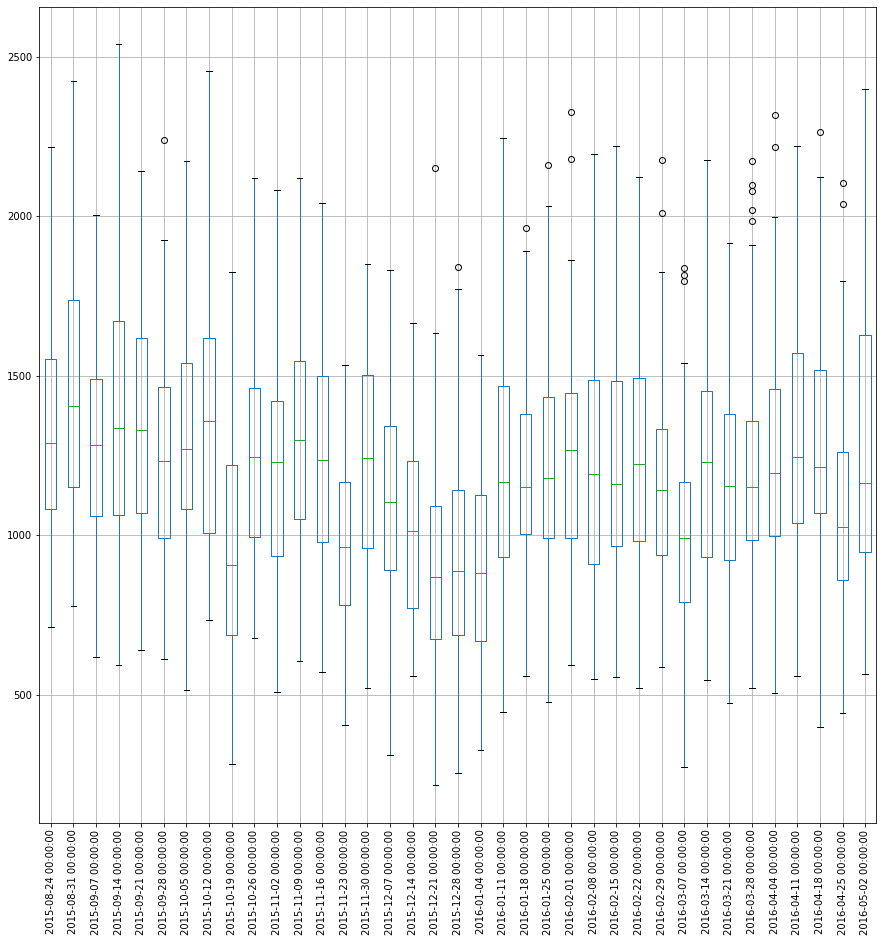

In [64]:
pd_cals.boxplot(figsize=(15,15))
plt.xticks(rotation=90);

In [65]:
pd_cals_flat = pd_cals.reset_index()

In [66]:
weeks = pd_cals.columns
l = len(weeks)
pvals = []
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_cals_flat[weeks[index]]
        next_week = pd_cals_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2015-08-31 00:00:00
reject null hypothesis
2015-09-07 00:00:00
reject null hypothesis
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
reject null hypothesis
2015-10-05 00:00:00
reject null hypothesis
2015-10-12 00:00:00
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
reject null hypothesis
2015-11-02 00:00:00
2015-11-09 00:00:00
reject null hypothesis
2015-11-16 00:00:00
reject null hypothesis
2015-11-23 00:00:00
reject null hypothesis
2015-11-30 00:00:00
reject null hypothesis
2015-12-07 00:00:00
reject null hypothesis
2015-12-14 00:00:00
reject null hypothesis
2015-12-21 00:00:00
reject null hypothesis
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
reject null hypothesis
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
2016-02-08 00:00:00
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
2016-03-07 00:00:00
reject null hypothesis
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
2016-03-28 00:00:00
2016-04-04 0

In [67]:
types = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']

In [68]:
w2w = weeks[1:]

In [69]:
w = w2w.map(lambda x: str(x)[0:10])

In [70]:
df_type = pd.DataFrame([w2w, types])
df_type

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2015-08-31 00:00:00,2015-09-07 00:00:00,2015-09-14 00:00:00,2015-09-21 00:00:00,2015-09-28 00:00:00,2015-10-05 00:00:00,2015-10-12 00:00:00,2015-10-19 00:00:00,2015-10-26 00:00:00,2015-11-02 00:00:00,...,2016-02-29 00:00:00,2016-03-07 00:00:00,2016-03-14 00:00:00,2016-03-21 00:00:00,2016-03-28 00:00:00,2016-04-04 00:00:00,2016-04-11 00:00:00,2016-04-18 00:00:00,2016-04-25 00:00:00,2016-05-02 00:00:00
1,2nd Week Back,Normal,Normal,Normal,Normal,Pre-Exams,Exams,Break,Back from Break,2nd Week Back,...,Exams,Break,Back from Break,2nd Week Back,Back from Break,2nd Week Back,Normal,Normal,Pre-Exams,Exams


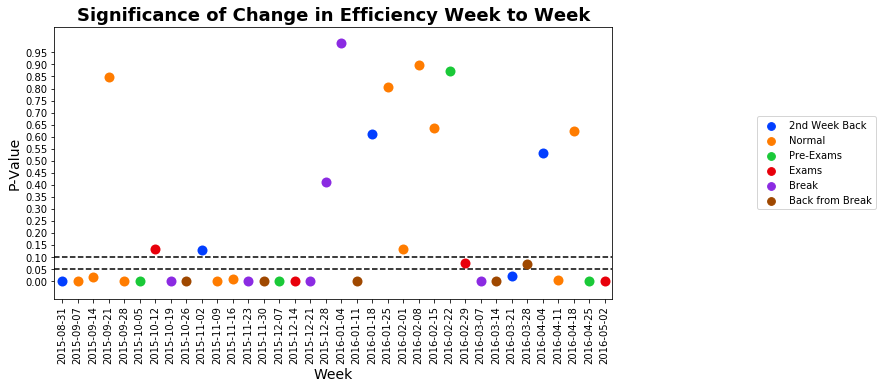

In [71]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=w, y=pvals, hue=types, size = 10, palette= 'bright');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y=.1, xmin=0, xmax=1, color='black', linestyle='--');
plt.axhline(y=.05, xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('P-Value', fontsize=14);
plt.title('Significance of Change in Efficiency Week to Week', fontsize=18, fontweight='bold');

In [72]:
def compareMean(weekData, pvals):
    tset, pval = ttest_1samp(weekData, pd_steps_flat.mean().mean())
    pvals.append(pval)
    print(pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    #else:
        #print("we are accepting null hypothesis")

In [73]:
weeks = pd_steps.columns
pvals = []
for w in weeks:
    print(w)
    this_week = pd_steps_flat[w]
    compareMean(this_week, pvals)

2015-08-24 00:00:00
3.137947478986631e-08
 we are rejecting null hypothesis
2015-08-31 00:00:00
1.0821139712114074e-12
 we are rejecting null hypothesis
2015-09-07 00:00:00
1.9252043059210568e-07
 we are rejecting null hypothesis
2015-09-14 00:00:00
5.790032864482114e-07
 we are rejecting null hypothesis
2015-09-21 00:00:00
1.0003204193077596e-08
 we are rejecting null hypothesis
2015-09-28 00:00:00
0.0022180691516585447
 we are rejecting null hypothesis
2015-10-05 00:00:00
8.686652260196596e-07
 we are rejecting null hypothesis
2015-10-12 00:00:00
3.045344293434995e-07
 we are rejecting null hypothesis
2015-10-19 00:00:00
3.6303926114781025e-12
 we are rejecting null hypothesis
2015-10-26 00:00:00
0.0005703610441912499
 we are rejecting null hypothesis
2015-11-02 00:00:00
0.0226839155360005
 we are rejecting null hypothesis
2015-11-09 00:00:00
0.00021907874011343128
 we are rejecting null hypothesis
2015-11-16 00:00:00
0.009881292972298452
 we are rejecting null hypothesis
2015-11-23 

In [74]:
types1 = ['Back from Break'
          ,'2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']

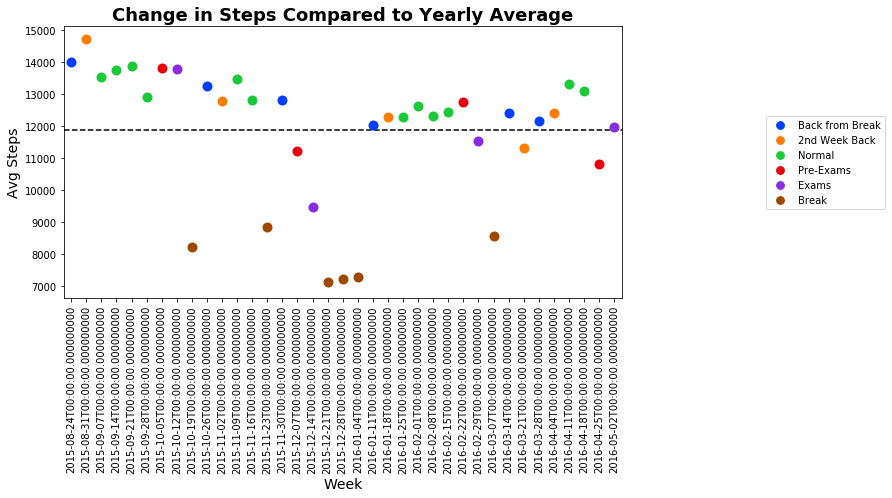

In [75]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=weeks, y=pd_steps_flat.mean(), hue=types1, size = 10, palette= 'bright');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);
#plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y= pd_steps_flat.mean().mean(), xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('Avg Steps', fontsize=14);
plt.title('Change in Steps Compared to Yearly Average', fontsize=18, fontweight='bold');